In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_key import data_gov_key
import sys


In [2]:
pres_finance = pd.DataFrame()

In [3]:
# testing getting values from the FEC api
cand_url = 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/'

# set the amount of data to be returned per page. Must be under 100
per_page = 50

params = {"api_key" : data_gov_key,
         "election_year" : "2016",
         "per_page" : per_page}

# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params)

# json'ing it up
cand_search = cand_search.json()

# stores the number of pages the search returns
page_nums = cand_search["pagination"]["pages"]

print(json.dumps(cand_search, indent=4))


{
    "api_version": "1.0",
    "results": [
        {
            "net_receipts": 1462314770.13,
            "candidate_party_affiliation": null,
            "candidate_last_name": "All candidates",
            "election_year": 2016,
            "candidate_id": "P00000001",
            "contributor_state": "US",
            "rounded_net_receipts": 1462.3
        },
        {
            "net_receipts": 799419661.15,
            "candidate_party_affiliation": "DEM",
            "candidate_last_name": "Democrats",
            "election_year": 2016,
            "candidate_id": "P00000002",
            "contributor_state": "US",
            "rounded_net_receipts": 799.4
        },
        {
            "net_receipts": 639144333.21,
            "candidate_party_affiliation": "REP",
            "candidate_last_name": "Republicans",
            "election_year": 2016,
            "candidate_id": "P00000003",
            "contributor_state": "US",
            "rounded_net_receipts": 639.1
    

In [4]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
#     print(json.dumps(cand_data, indent=4))
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")
   

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [5]:
pres_finance = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00000002,DEM,Democrats,0.0,KE
1646,P00003392,DEM,Clinton,0.0,BE
1647,P00000001,None,All candidates,0.0,BE
1648,P00000002,DEM,Democrats,0.0,BE


In [6]:
cand_search['results'][0]['rounded_net_receipts']

1462.3

In [7]:
page_nums = 2
params['page'] = page_nums
params

{'api_key': 'y7OEg0YLriSiwo3o1L90fShNhSBEYQxkHgB1Ey3d',
 'election_year': '2016',
 'per_page': 50,
 'page': 2}

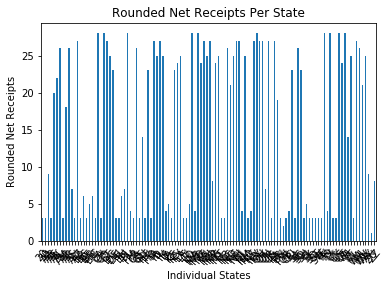

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


contributions_candidates_by_state = pres_finance.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_state = pd.DataFrame(contributions_candidates_by_state)

also = pyplot_bar_state.plot.bar(legend=False,rot=50)
also
plt.xlabel("Individual States")
plt.ylabel("Rounded Net Receipts")
plt.title("Rounded Net Receipts Per State")
plt.savefig("pyplot_bar_state")





# contributions_candidates_by_state = pres_finance.groupby("contributor_state").count()["rounded_net_receipts"]
# pyplot_bar = pd.DataFrame(contributions_candidates_by_state)

# pyplot_bar_copy = pyplot_bar.reset_index()
# df_a["contributor_state"].unique()



# df_a = pyplot_bar_copy.loc[pyplot_bar_copy["contributor_state"] != "20" , ]
# df_a["contributor_state"].unique()
# pyplot_bar["contributor_state"]
# also = pyplot_bar.plot.bar(legend=False,rot=50)
# also
# plt.xlabel("Contributor State")
# plt.ylabel("Rounded Net Receipts")
# plt.title("Contributions To Candidates Regarding States")
# plt.savefig("pyplot_bar")

In [9]:
state_list = ["AL", "AK","AZ","AR","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI",
              "MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX",
             "UT","VT","VA","WA","WV","WI","WY"]

In [10]:
pres_finance_states=pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_states]
states_df = pd.DataFrame(pres_finance[pres_finance_states])

In [11]:
states_df

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
6,P00000001,None,All candidates,172.0,NY
7,P00000002,DEM,Democrats,153.9,NY
9,P00003392,DEM,Clinton,145.2,NY
13,P00000001,None,All candidates,75.9,TX
15,P00000001,None,All candidates,58.1,FL
...,...,...,...,...,...
1582,P60007697,REP,Graham,0.0,ME
1586,P20003281,REP,Perry,0.0,UT
1587,P20003281,REP,Perry,0.0,MD
1589,P80003478,REP,Huckabee,0.0,VT


NameError: name 'output' is not defined

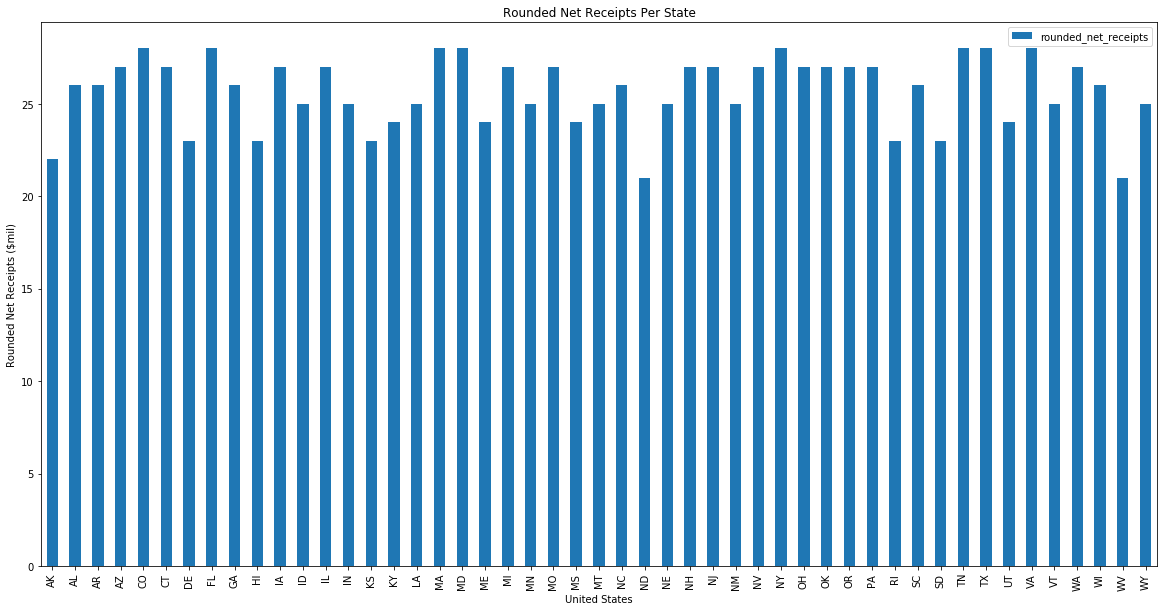

In [12]:
states_receipts = states_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_United_States = pd.DataFrame(states_receipts)

also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10))
also
plt.xlabel("United States")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Rounded Net Receipts Per State")
output/plt.savefig("pyplot_bar_United_States")

In [ ]:
pres_finance_countries=~pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_countries]
countries_df = pd.DataFrame(pres_finance[pres_finance_countries])
countries_df

In [ ]:
countries_receipts = countries_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_United_States = pd.DataFrame(states_receipts)

also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10))
also
plt.xlabel("United States")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Rounded Net Receipts Per Country")
output/plt.savefig("pyplot_bar_United_States")

In [ ]:
states_receipts = states_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_United_States = pd.DataFrame(states_receipts)

also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10))
# also = pyplot_bar_United_States.plot.bar(legend=False,rot=50)
also
plt.xlabel("United States")
plt.ylabel("Rounded Net Receipts")
plt.title("Rounded Net Receipts Per State")
plt.savefig("pyplot_bar_United_States")

In [ ]:
# Create lists for df
fifty_states = []
candidate_id = []
candidate_party = []
candidate_last_name = []
rouded_net_receipts = []


In [ ]:
for state in state_list:
    pres_finance.loc[pres_finance["contributor_state"]== state]
    


In [ ]:
# combined_df = pd.merge(alabama_df,alaska_df,arizona_df,arkansas_df,colorado_df,
#                        connecticut_df,delaware_df,florida_df,georgia_df,hawaii_df,
#                       idaho_df,illinois_df,indiana_df,iowa_df,kansas_df,kentucky_df,
#                       louisiana_df,maine_df,maryland_df,massachusetts_df,michigan_df,
#                       minnesota_df,mississippi_df,missouri_df,montana_df,nebraska_df,
#                       nevada_df,new_hampshire_df,new_jersey_df,new_mexico_df,new_york_df,
#                       north_carolina_df,north_dakota_df,ohio_df,oklahoma_df,oregon_df,
#                       pennsylvania_df,rhode_island_df,south_carolina_df,south_dakota_df,
#                       tennessee_df,texas_df,utah_df,vermont_df,virginia_df,washington_df,
#                       west_virginia_df,wisconsin_df,wyoming_df, on=("contributor_state"))

In [ ]:
# alabama_df = pres_finance.loc[pres_finance["contributor_state"] == "AL",:]
# alaska_df = pres_finance.loc[pres_finance["contributor_state"] == "AK",:]
# arizona_df = pres_finance.loc[pres_finance["contributor_state"] == "AZ",:]
# arkansas_df = pres_finance.loc[pres_finance["contributor_state"] == "AR",:]
# colorado_df = pres_finance.loc[pres_finance["contributor_state"] == "CO",:]
# connecticut_df = pres_finance.loc[pres_finance["contributor_state"] == "CT",:]
# delaware_df = pres_finance.loc[pres_finance["contributor_state"] == "DE",:]
# florida_df = pres_finance.loc[pres_finance["contributor_state"] == "FL",:]
# georgia_df = pres_finance.loc[pres_finance["contributor_state"] == "GA",:]
# hawaii_df = pres_finance.loc[pres_finance["contributor_state"] == "HI",:]
# idaho_df = pres_finance.loc[pres_finance["contributor_state"] == "ID",:]
# illinois_df = pres_finance.loc[pres_finance["contributor_state"] == "IL",:]
# indiana_df = pres_finance.loc[pres_finance["contributor_state"] == "IN",:]
# iowa_df = pres_finance.loc[pres_finance["contributor_state"] == "IA",:]
# kansas_df = pres_finance.loc[pres_finance["contributor_state"] == "KS",:]
# kentucky_df = pres_finance.loc[pres_finance["contributor_state"] == "KY",:]
# louisiana_df = pres_finance.loc[pres_finance["contributor_state"] == "LA",:]
# maine_df = pres_finance.loc[pres_finance["contributor_state"] == "ME",:]
# maryland_df = pres_finance.loc[pres_finance["contributor_state"] == "MD",:]
# massachusetts_df = pres_finance.loc[pres_finance["contributor_state"] == "MA",:]
# michigan_df = pres_finance.loc[pres_finance["contributor_state"] == "MI",:]
# minnesota_df = pres_finance.loc[pres_finance["contributor_state"] == "MN",:]
# mississippi_df = pres_finance.loc[pres_finance["contributor_state"] == "MS",:]
# missouri_df = pres_finance.loc[pres_finance["contributor_state"] == "MO",:]
# montana_df = pres_finance.loc[pres_finance["contributor_state"] == "MT",:]
# nebraska_df = pres_finance.loc[pres_finance["contributor_state"] == "NE",:]
# nevada_df = pres_finance.loc[pres_finance["contributor_state"] == "NV",:]
# new_hampshire_df = pres_finance.loc[pres_finance["contributor_state"] == "NH",:]
# new_jersey_df = pres_finance.loc[pres_finance["contributor_state"] == "NJ",:]
# new_mexico_df = pres_finance.loc[pres_finance["contributor_state"] == "NM",:]
# new_york_df = pres_finance.loc[pres_finance["contributor_state"] == "NY",:]
# north_carolina_df = pres_finance.loc[pres_finance["contributor_state"] == "NC",:]
# north_dakota_df = pres_finance.loc[pres_finance["contributor_state"] == "ND",:]
# ohio_df = pres_finance.loc[pres_finance["contributor_state"] == "OH",:]
# oklahoma_df = pres_finance.loc[pres_finance["contributor_state"] == "OK",:]
# oregon_df = pres_finance.loc[pres_finance["contributor_state"] == "OR",:]
# pennsylvania_df = pres_finance.loc[pres_finance["contributor_state"] == "PA",:]
# rhode_island_df = pres_finance.loc[pres_finance["contributor_state"] == "RI",:]
# south_carolina_df = pres_finance.loc[pres_finance["contributor_state"] == "SC",:]
# south_dakota_df = pres_finance.loc[pres_finance["contributor_state"] == "SD",:]
# tennessee_df = pres_finance.loc[pres_finance["contributor_state"] == "TN",:]
# texas_df = pres_finance.loc[pres_finance["contributor_state"] == "TX",:]
# utah_df = pres_finance.loc[pres_finance["contributor_state"] == "UT",:]
# vermont_df = pres_finance.loc[pres_finance["contributor_state"] == "VT",:]
# virginia_df = pres_finance.loc[pres_finance["contributor_state"] == "VA",:]
# washington_df = pres_finance.loc[pres_finance["contributor_state"] == "WA",:]
# west_virginia_df = pres_finance.loc[pres_finance["contributor_state"] == "WV",:]
# wisconsin_df = pres_finance.loc[pres_finance["contributor_state"] == "WI",:]
# wyoming_df = pres_finance.loc[pres_finance["contributor_state"] == "WY",:]
